# TAREA EXTRA: FEATURE SELECTION Y PCA CON WINE DATASET  

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_scaled, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Features más importantes según Random Forest:\n", importances.head(5))


Features más importantes según Random Forest:
 flavanoids                      0.183580
proline                         0.172865
color_intensity                 0.164199
alcohol                         0.123381
od280/od315_of_diluted_wines    0.102783
dtype: float64


In [4]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nVarianza explicada por 2 componentes: {pca.explained_variance_ratio_.sum():.2%}")



Varianza explicada por 2 componentes: 55.41%


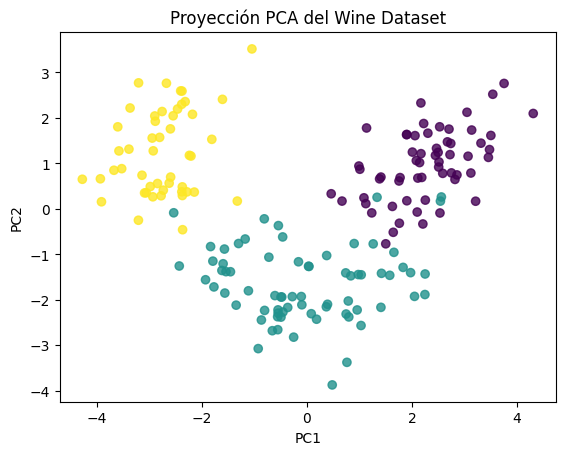

In [5]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA del Wine Dataset")
plt.show()